In [4]:
import pandas as pd
import arff  # pip install liac-arff

# Read ARFF file
with open("Training Dataset.arff") as f:
    dataset = arff.load(f)

# Convert to pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Save as CSV
df.to_csv("Training Dataset.csv", index=False)

print("Converted successfully!")

Converted successfully!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# prettier plots
sns.set(style="whitegrid")


In [10]:

df = pd.read_csv("Training Dataset.csv")

# Show the first few rows
df.head()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [11]:
# Dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Column names
print("Columns:\n", df.columns.tolist())


Dataset contains 11055 rows and 31 columns.

Columns:
 ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']


In [12]:
# Check for any missing/null values
missing = df.isnull().sum()
if missing.sum() == 0:
    print(" No missing values in the dataset.")
else:
    print(" Missing values:\n", missing[missing > 0])


 No missing values in the dataset.


Class Distribution:
 Result
 1    6157
-1    4898
Name: count, dtype: int64


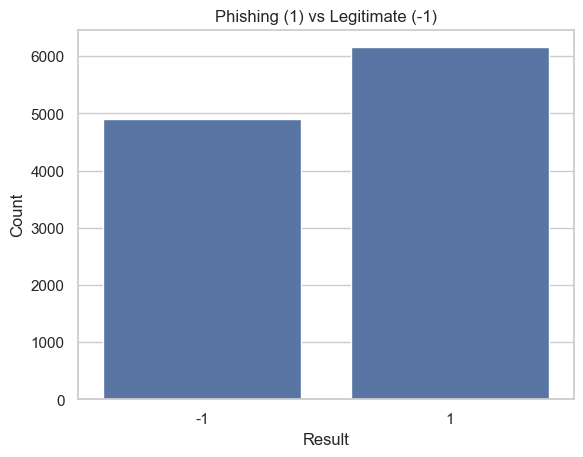

In [13]:
# Check if target column is 'Result' or something else (adjust accordingly)
print("Class Distribution:\n", df['Result'].value_counts())

# Plot class distribution
sns.countplot(data=df, x='Result')
plt.title('Phishing (1) vs Legitimate (-1)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


In [14]:
# Helpful for spotting binary, constant, or categorical features
unique_vals = df.nunique().sort_values()
print("Unique values per column:\n", unique_vals)


Unique values per column:
 having_IP_Address              2
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
port                           2
Favicon                        2
Domain_registeration_length    2
Request_URL                    2
HTTPS_token                    2
popUpWidnow                    2
RightClick                     2
on_mouseover                   2
Redirect                       2
Abnormal_URL                   2
Submitting_to_email            2
DNSRecord                      2
Page_Rank                      2
Google_Index                   2
Statistical_report             2
Result                         2
age_of_domain                  2
Iframe                         2
URL_Length                     3
SFH                            3
Links_in_tags                  3
URL_of_Anchor                  3
SSLfinal_State                 3
having_Sub_Domain              3
web_traffic     

In [15]:
# Summary statistics
df.describe()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Drop any columns with only one unique value
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Dropping column: {col}")
        df.drop(columns=[col], inplace=True)


In [18]:
# X = all columns except the target
X = df.drop('Result', axis=1)

# y = target column
y = df['Result']


Class distribution:
 Result
 1    6157
-1    4898
Name: count, dtype: int64


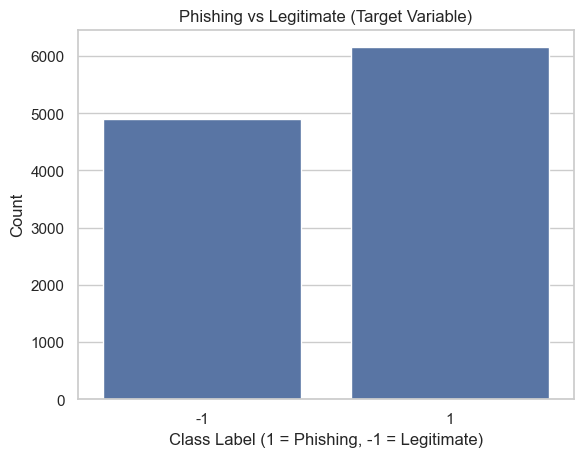

In [19]:
# Class distribution
print("Class distribution:\n", y.value_counts())

# Plot it
sns.countplot(x=y)
plt.title("Phishing vs Legitimate (Target Variable)")
plt.xlabel("Class Label (1 = Phishing, -1 = Legitimate)")
plt.ylabel("Count")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (8844, 30), Testing set: (2211, 30)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transform to test data
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
# Initialize model
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [24]:
y_pred = model.predict(X_test)


In [25]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision, Recall, F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9303

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92       980
           1       0.93      0.94      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



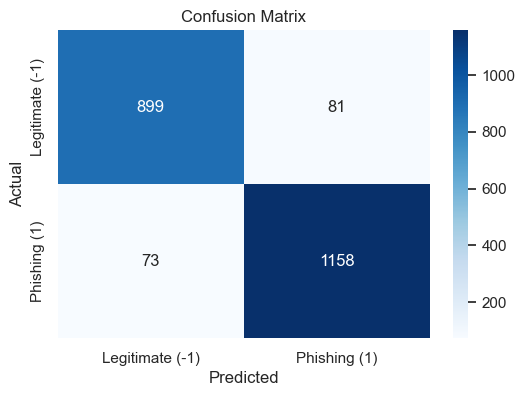

In [26]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate (-1)', 'Phishing (1)'],
            yticklabels=['Legitimate (-1)', 'Phishing (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


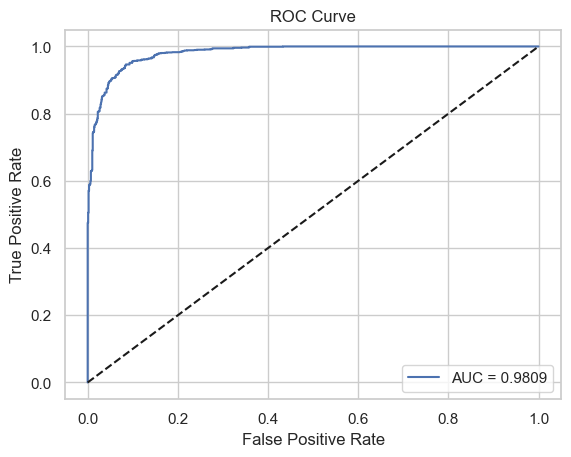

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc = roc_auc_score(y_test, y_prob)

# Plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


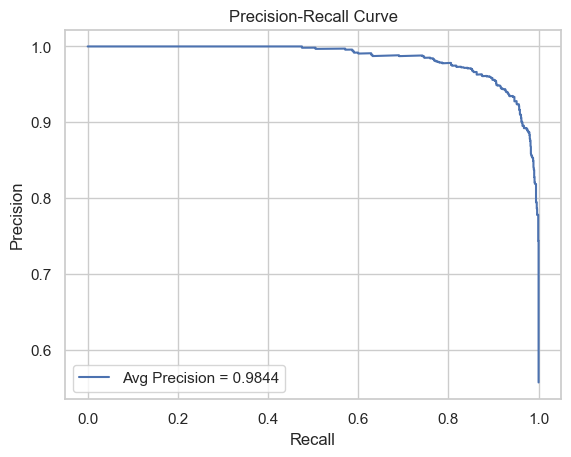

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label=1)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f"Avg Precision = {avg_precision:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.4f}")


Log Loss: 0.1756


In [30]:
joblib.dump(model, 'phishing_model.pkl')
print("Model saved as phishing_model.pkl")


Model saved as phishing_model.pkl
